# Import needed libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


### Load ASL MNIST train and test datasets, process and return the processed data

In [3]:
def load_data():
    train_df = pd.read_csv('data/sign_mnist_train.csv')
    test_df = pd.read_csv('data/sign_mnist_test.csv')

    # Filter out invalid labels (0 to 23)
    train_df = train_df[train_df['label'].isin(range(24))]
    test_df = test_df[test_df['label'].isin(range(24))]
    
    # Extract labels (do NOT normalize)
    y_train = train_df['label'].values
    y_test = test_df['label'].values
    
    # Extract and normalize pixel values
    x_train = train_df.drop('label', axis=1).values / 255.0
    x_test = test_df.drop('label', axis=1).values / 255.0
    
    # Reshape for Conv2D (28x28 grayscale images)
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    
    return x_train, y_train, x_test, y_test


### Build classification model from the inputs

In [4]:
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

### Function to report model performance metrics on test dataset (Loss and Accuracy)

In [5]:
def report_performance(model, x_test, y_test):
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    return loss, acc # print(f'\nTest accuracy: {acc:.4f}, Test loss: {loss:.4f}')


### Train the model

In [6]:
def train_model(x_train, y_train):
    num_classes = 24  # Sign MNIST has 24 classes (0 to 23)
    print("Unique labels in y_train:", np.unique(y_train))
    # print("Unique labels in y_test:", np.unique(y_test))
    
    # Build model with correct input shape
    model = build_model(input_shape=(28, 28, 1), num_classes=num_classes)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
    
    history = model.fit(
        x_train, y_train,
        epochs=30,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping]
    )

    model.summary()
    model.save('sign_language_model.keras')
    return history, model 


### Load data, build model and get perfromance report

In [7]:
# Load data:
x_train, y_train, x_test, y_test = load_data()

# Train and save model
hist, model = train_model(x_train, y_train)
print(hist)

# Get model performance on test data
loss, accuracy = report_performance(model, x_test, y_test)
print("\n\nTest Loss: ", loss)
print('Test accuracy: ', accuracy)


Unique labels in y_train: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


C:\Users\STUDENT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.2500 - loss: 2.4378 - val_accuracy: 0.8861 - val_loss: 0.4105
Epoch 2/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8361 - loss: 0.4887 - val_accuracy: 0.9804 - val_loss: 0.0865
Epoch 3/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9367 - loss: 0.1884 - val_accuracy: 0.9979 - val_loss: 0.0210
Epoch 4/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9701 - loss: 0.0954 - val_accuracy: 0.9991 - val_loss: 0.0078
Epoch 5/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9838 - loss: 0.0544 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 6/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9889 - loss: 0.0380 - val_accuracy: 0.9998 - val_loss: 0.0026
Epoch 7/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9934 - loss: 0.0257 - val_accuracy: 0.9994 - val_loss: 0.0021
Epoch 8/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9921 - loss: 0.0250 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         6,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,182,026 (4.51 MB)

 Trainable params: 394,008 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 788,018 (3.01 MB)



Test Loss:  0.2105943113565445
Test accuracy:  0.9571637511253357


### Plot of training and validation accuracy

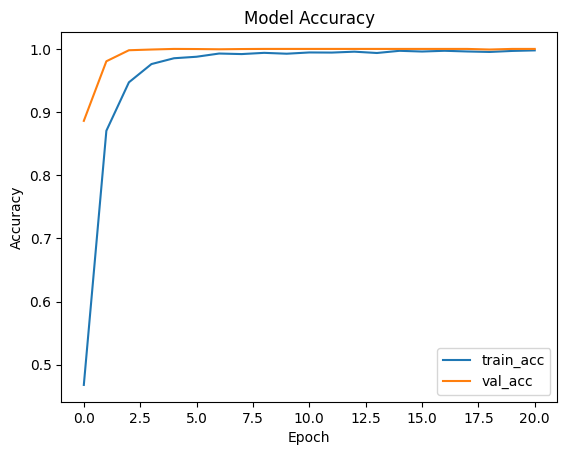

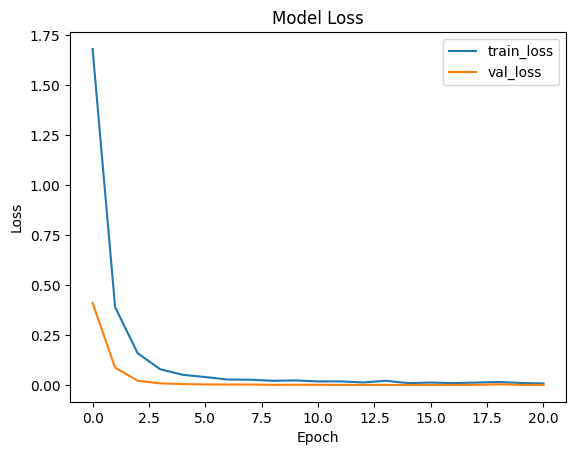

In [14]:
# Plot training & validation accuracy
plt.plot(hist.history['accuracy'], label='train_acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()